# Task 2 - Dimensionality Reduction (33 points)

**Task Definition:** A video game company has been working on creating quests for their new video game, but they did not document their decisions well and cannot tell  how many different quests they agreed on. They ask you to look into the data to find out how many different types of quests they created. For this you need to use different dimensionality reduction techniques.

**Input:** The provided input file (`quest_data.txt`) contains the data about the quests. Each line in the file corresponds to a quest and has the following features:

- Estimated length (minutes)
- Number of NPCs to interact with
- Number of resources to collect
- Number of special items the user could find
- Experience points to earn
- Coordinates of the NPC giving the quest (X, Y)

In [56]:
# TODO: uncomment the packages you used, please do not import additional non-native packages
# you may change the imports to the following format: from [package] import [class, method, etc.]

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA, NMF
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# import scipy
import seaborn as sns

## 2.1 Getting to know the data (6 points)

**Task:** Load the dataset to a pandas DataFrame and display the pairwise relationship of the features using seaborn. (3 points)

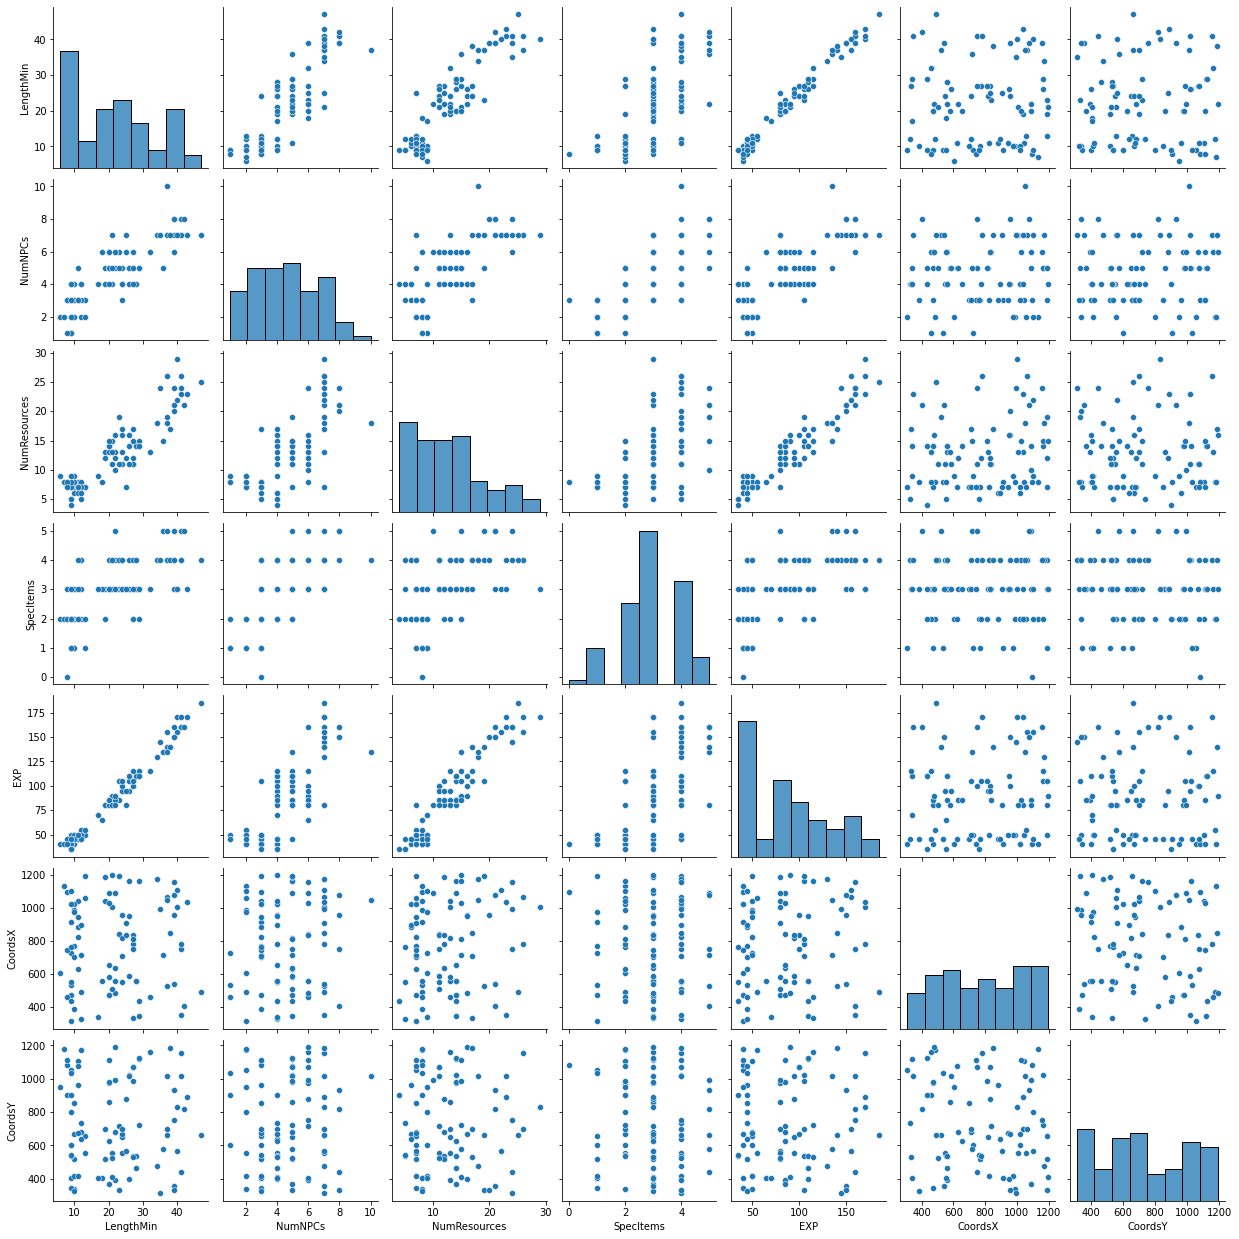

In [57]:
# Load the dataset into a DataFrame
df = pd.read_csv('data/quest_data.csv')

# Display pairwise relationships using seaborn
sns.pairplot(df)

**Report:** Based on the pairplot answer the following questions: (3 points)
-- Do you recognize any data distribution? (e.g. Gaussian, uniform)
-- Are there any correlated feature pairs?
-- Is selecting some features sufficient for finding (well separable) clusters in the data?

## 2.2 Preprocessing and PCA (21 points)

**Task:** In this task you will experience that preprocessing the dataset before using PCA could lead to results better for clustering. Create the following versions:

1) Apply PCA on the original dataset without preprocessing. (2 points)
2) Scale the data using an appropriate scaler and apply PCA on the scaled data. (4 points)
3) Remove noise features from the data (e.g. features with uniform distribution), scale the reduced dataset and apply PCA on the scaled data. (6 points)

For each version create a scatter plot using the principal components and print out the explained variance. (3 points)

**Hint:** You can use the PCA implementation from sklearn.decomposition and an appropriate scaler from sklearn.preprocessing.

Explained Variance (Without Preprocessing): [0.99587235 0.00295619]


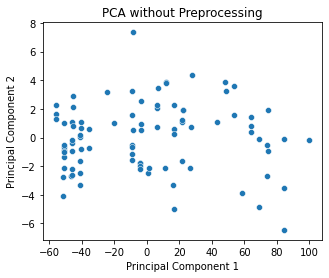

Explained Variance (Scaled Data): [0.82576949 0.10798179]


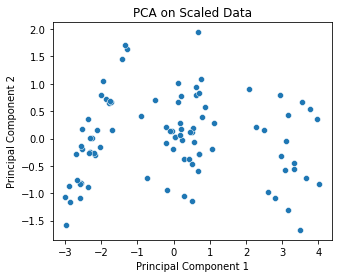

Explained Variance (Removed Noise Features): [0.77228425 0.14820677]


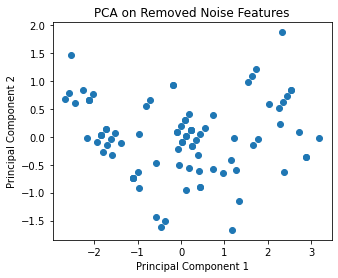

In [123]:
# Separate the features and target variable
X = df.iloc[:, :-2]

# 1) Apply PCA on the original dataset without preprocessing
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
print("Explained Variance (Without Preprocessing):", explained_variance)

# Scatter plot for PCA without preprocessing
plt.figure(figsize=(5, 4))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA without Preprocessing")
plt.show()

# 2) Scale the data using an appropriate scaler and apply PCA on the scaled data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_pca = pca.fit_transform(X_scaled)
explained_variance_scaled = pca.explained_variance_ratio_
print("Explained Variance (Scaled Data):", explained_variance_scaled)

# Scatter plot for PCA on scaled data
plt.figure(figsize=(5, 4))
sns.scatterplot(x=X_scaled_pca[:, 0], y=X_scaled_pca[:, 1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA on Scaled Data")
plt.show()

# 3) Scale the reduced dataset and apply PCA on the scaled reduced dataset
reduced_X = X.drop(X.columns[[0,4]], axis=1)
reduced_X_scaled = scaler.fit_transform(reduced_X)
principal_components_reduced = pca.fit_transform(reduced_X_scaled)
explained_variance = pca.explained_variance_ratio_
print("Explained Variance (Removed Noise Features):", explained_variance)

# Scatter plot of the principal components
plt.figure(figsize=(5, 4))
plt.scatter(x=principal_components_reduced[:, 0], y=principal_components_reduced[:, 1])
plt.title('PCA on Removed Noise Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**Report:** Based on your experiments and knowledge from the lectures, explain why you get better or worse results when scaling and removing noise features from this dataset. (6 points)

**Hint:** You could consider the general goal of PCA, the explained variance, or compare the variance of the features (e.g. with the var() method of pandas DataFrames).

In [120]:
variances = X.var()
print("Variances of the features:")
print(variances)

Variances of the features:
LengthMin        125.805868
NumNPCs            3.587516
NumResources      34.858427
SpecItems          1.190512
EXP             1742.724719
dtype: float64


Result:
1. Without preprocessing: Explained Variance - [0.99587235, 0.00295619]
2. Scaling the data: Explained Variance - [0.82576949, 0.10798179]
3. Removed noise features ("LengthMin" & "EXP"): Explained Variance - [0.77228425, 0.14820677]
4. Removed noise features ("NumNPCs" & "SpecItems"): Explained Variance - [0.96516751, 0.03403965]

Based on these results, we can conclude that the approach without preprocessing has the best results in terms of explained variance. 

Removing noise features can help reduce the influence of irrelevant or redundant information and potentially improve the interpretability of the quest types, but it may also lead to a loss of variance explained by the principal components.

Scaling the data can ensure that all features are on the same scale and prevent dominance by features with high variances. It allows for a better comparison of features on the same scale, but it also reduces the variance captured by the principal components.

## 2.3 Non-Negative Matrix Factorization (6 points)

**Task:** Apply NMF on the data based on your experience from Task 2.2. Create a scatter plot of the solutions. (6 points)

**Hint:** You can use the NMF implementation from sklearn.decomposition. What properties need the dataset have to apply NMF on it? Transform the data by using an appropriate scaler from sklearn.preprocessing.

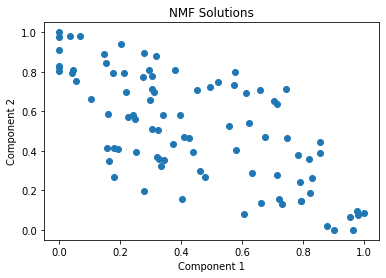

In [92]:
from sklearn.decomposition import NMF
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Apply NMF on the data
nmf = NMF(n_components=2)
nmf_solution = nmf.fit_transform(X)

# Scale the transformed data
scaler = MinMaxScaler()
scaled_nmf_solution = scaler.fit_transform(nmf_solution)

# Create a scatter plot of the solutions
plt.scatter(scaled_nmf_solution[:, 0], scaled_nmf_solution[:, 1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('NMF Solutions')
plt.show()

External sources:

1. https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html
2. https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
3. https://chat.openai.com
4. https://www.statisticshowto.com/explained-variance-variation/